#   Crédit Scoring


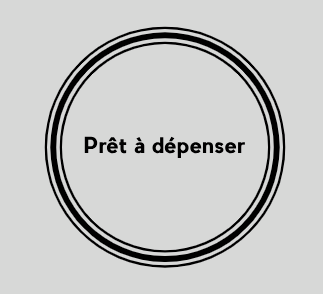

In [1]:
#On importe les librairies
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
from sklearn.preprocessing import LabelEncoder


## Importer les données

In [2]:
warnings.filterwarnings('ignore')

In [3]:
#On importe une classe de couleurs les réétuliser
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [4]:
#On met tous les csv dans une variable
all_files = glob.glob("*.csv")

In [5]:
#Verification
all_files

['application_test.csv',
 'application_train.csv',
 'bureau.csv',
 'bureau_balance.csv',
 'credit_card_balance.csv',
 'HomeCredit_columns_description.csv',
 'installments_payments.csv',
 'POS_CASH_balance.csv',
 'previous_application.csv',
 'sample_submission.csv']

In [6]:
pd.read_csv('HomeCredit_columns_description.csv', encoding= 'unicode_escape')

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
...,...,...,...,...,...
214,217,installments_payments.csv,NUM_INSTALMENT_NUMBER,On which installment we observe payment,NaN
215,218,installments_payments.csv,DAYS_INSTALMENT,When the installment of previous credit was su...,time only relative to the application
216,219,installments_payments.csv,DAYS_ENTRY_PAYMENT,When was the installments of previous credit p...,time only relative to the application
217,220,installments_payments.csv,AMT_INSTALMENT,What was the prescribed installment amount of ...,NaN


In [7]:
#On fait une boucle pour mettre chaque csv dans un DataFrame
naming = []
for n in all_files : 
    naming.append(n.replace('.csv',''))
df_dic = {}
for i,n in zip(all_files,naming):
    if i == 'HomeCredit_columns_description.csv' or i == 'application_test.csv' or i == 'sample_submission.csv':
        None
    else:
        print (i)
        df_dic[n]= pd.read_csv(i)
    

application_train.csv
bureau.csv
bureau_balance.csv
credit_card_balance.csv
installments_payments.csv
POS_CASH_balance.csv
previous_application.csv


In [8]:
#On affiche la variable df_dic voir comment elle retourne les df
df_dic

{'application_train':         SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
 0           100002       1         Cash loans           M            N   
 1           100003       0         Cash loans           F            N   
 2           100004       0    Revolving loans           M            Y   
 3           100006       0         Cash loans           F            N   
 4           100007       0         Cash loans           M            N   
 ...            ...     ...                ...         ...          ...   
 307506      456251       0         Cash loans           M            N   
 307507      456252       0         Cash loans           F            N   
 307508      456253       0         Cash loans           F            N   
 307509      456254       1         Cash loans           F            N   
 307510      456255       0         Cash loans           F            N   
 
        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
 0    

In [9]:
#On fait une boucle pour afficher tous les df
for i in df_dic:
    print(i)
    display(df_dic[i])

application_train


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


bureau


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,currency 1,-44,0,-30.0,NaN,0.0,0,11250.00,11250.0,0.0,0.0,Microloan,-19,NaN
1716424,100044,5057754,Closed,currency 1,-2648,0,-2433.0,-2493.0,5476.5,0,38130.84,0.0,0.0,0.0,Consumer credit,-2493,NaN
1716425,100044,5057762,Closed,currency 1,-1809,0,-1628.0,-970.0,NaN,0,15570.00,NaN,NaN,0.0,Consumer credit,-967,NaN
1716426,246829,5057770,Closed,currency 1,-1878,0,-1513.0,-1513.0,NaN,0,36000.00,0.0,0.0,0.0,Consumer credit,-1508,NaN


bureau_balance


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
...,...,...,...
27299920,5041336,-47,X
27299921,5041336,-48,X
27299922,5041336,-49,X
27299923,5041336,-50,X


credit_card_balance


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840307,1036507,328243,-9,0.000,45000,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
3840308,1714892,347207,-9,0.000,45000,0.0,0.0,0.0,0.0,0.000,...,0.000,0.000,0.0,0,0.0,0.0,23.0,Active,0,0
3840309,1302323,215757,-9,275784.975,585000,270000.0,270000.0,0.0,0.0,2250.000,...,273093.975,273093.975,2.0,2,0.0,0.0,18.0,Active,0,0
3840310,1624872,430337,-10,0.000,450000,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0


installments_payments


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585
...,...,...,...,...,...,...,...,...
13605396,2186857,428057,0.0,66,-1624.0,NaN,67.500,NaN
13605397,1310347,414406,0.0,47,-1539.0,NaN,67.500,NaN
13605398,1308766,402199,0.0,43,-7.0,NaN,43737.435,NaN
13605399,1062206,409297,0.0,43,-1986.0,NaN,67.500,NaN


POS_CASH_balance


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0
...,...,...,...,...,...,...,...,...
10001353,2448283,226558,-20,6.0,0.0,Active,843,0
10001354,1717234,141565,-19,12.0,0.0,Active,602,0
10001355,1283126,315695,-21,10.0,0.0,Active,609,0
10001356,1082516,450255,-22,12.0,0.0,Active,614,0


previous_application


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [10]:
for cle, valeur in df_dic.items():
    print(f' {cle :-<50}{df_dic[cle].shape}')

 application_train---------------------------------(307511, 122)
 bureau--------------------------------------------(1716428, 17)
 bureau_balance------------------------------------(27299925, 3)
 credit_card_balance-------------------------------(3840312, 23)
 installments_payments-----------------------------(13605401, 8)
 POS_CASH_balance----------------------------------(10001358, 8)
 previous_application------------------------------(1670214, 37)


### Afficher les valeurs manquantes

In [11]:
#on affiche le pourcentage de valeurs manquante
for cle, valeur in df_dic.items():
    print(color.BOLD + cle + color.END + f" :\n\n{(df_dic[cle].isna().sum()/df_dic[cle].shape[0]).sort_values(ascending=False)}\n")

application_train :

COMMONAREA_MEDI             0.698723
COMMONAREA_AVG              0.698723
COMMONAREA_MODE             0.698723
NONLIVINGAPARTMENTS_MODE    0.694330
NONLIVINGAPARTMENTS_AVG     0.694330
                              ...   
NAME_HOUSING_TYPE           0.000000
NAME_FAMILY_STATUS          0.000000
NAME_EDUCATION_TYPE         0.000000
NAME_INCOME_TYPE            0.000000
SK_ID_CURR                  0.000000
Length: 122, dtype: float64

bureau :

AMT_ANNUITY               0.714735
AMT_CREDIT_MAX_OVERDUE    0.655133
DAYS_ENDDATE_FACT         0.369170
AMT_CREDIT_SUM_LIMIT      0.344774
AMT_CREDIT_SUM_DEBT       0.150119
DAYS_CREDIT_ENDDATE       0.061496
AMT_CREDIT_SUM            0.000008
CREDIT_ACTIVE             0.000000
CREDIT_CURRENCY           0.000000
DAYS_CREDIT               0.000000
CREDIT_DAY_OVERDUE        0.000000
SK_ID_BUREAU              0.000000
CNT_CREDIT_PROLONG        0.000000
AMT_CREDIT_SUM_OVERDUE    0.000000
CREDIT_TYPE               0.000000
DAYS_CRE

### une fonction pour gagner en mémoire

In [12]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [13]:
naming_reduce = []
for n in df_dic : 
    naming_reduce.append(n)
df_dic_reduce = {}
for i,n in zip(df_dic,naming_reduce):
        df_dic_reduce[n]= reduce_mem_usage(df_dic[i])

Memory usage of dataframe is 286.23 MB
Memory usage after optimization is: 92.38 MB
Decreased by 67.7%
Memory usage of dataframe is 222.62 MB
Memory usage after optimization is: 112.95 MB
Decreased by 49.3%
Memory usage of dataframe is 624.85 MB
Memory usage after optimization is: 338.46 MB
Decreased by 45.8%
Memory usage of dataframe is 673.88 MB
Memory usage after optimization is: 289.33 MB
Decreased by 57.1%
Memory usage of dataframe is 830.41 MB
Memory usage after optimization is: 311.40 MB
Decreased by 62.5%
Memory usage of dataframe is 610.43 MB
Memory usage after optimization is: 238.45 MB
Decreased by 60.9%
Memory usage of dataframe is 471.48 MB
Memory usage after optimization is: 309.01 MB
Decreased by 34.5%


In [14]:
# mettre les df en copy
df_train = df_dic_reduce['application_train'].copy()
df_bureau = df_dic_reduce['bureau'].copy()
df_bureau_balance = df_dic_reduce['bureau_balance'].copy()
df_credit_card_balance = df_dic_reduce['credit_card_balance'].copy()
df_installments_payments = df_dic_reduce['installments_payments'].copy()
df_POS_CASH_balance = df_dic_reduce['POS_CASH_balance'].copy()
df_previous_application = df_dic_reduce['previous_application'].copy()

### df_train

In [15]:
# créer 3 ratio 
df_train['LOAN_INCOME_RATIO'] = df_train['AMT_CREDIT'] / df_train['AMT_INCOME_TOTAL']
df_train['ANNUITY_INCOME_RATIO'] = df_train['AMT_ANNUITY'] / df_train['AMT_INCOME_TOTAL']
df_train['CONSUMER_GOODS_RATIO'] = df_train['AMT_CREDIT'] / df_train['AMT_GOODS_PRICE']

In [16]:
df_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,LOAN_INCOME_RATIO,ANNUITY_INCOME_RATIO,CONSUMER_GOODS_RATIO
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0.0,0.0,0.0,0.0,0.0,1.0,2.007889,0.121978,1.158397
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,4.790750,0.132217,1.145199
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000,0.100000,1.000000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,NaN,NaN,NaN,NaN,NaN,NaN,2.316167,0.219900,1.052803
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,4.222222,0.179963,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,1.617143,0.174971,1.132000
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,NaN,NaN,NaN,NaN,NaN,NaN,3.743750,0.166688,1.198000
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,1.0,0.0,0.0,1.0,0.0,1.0,4.429176,0.195941,1.158400
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,2.164368,0.118158,1.158394


In [17]:
# Création des colonnes
df_train['ANNUITY LENGTH'] = df_train['AMT_CREDIT'] / df_train['AMT_ANNUITY']
df_train['ANN_LENGTH_EMPLOYED_RATIO'] = df_train['ANNUITY LENGTH'] / df_train['DAYS_EMPLOYED']
df_train['WORKING_LIFE_RATIO'] = df_train['DAYS_EMPLOYED'] / df_train['DAYS_BIRTH']
df_train['INCOME_PER_FAM'] = df_train['AMT_INCOME_TOTAL'] / df_train['CNT_FAM_MEMBERS']
df_train['CHILDREN_RATIO'] = (1 + df_train['CNT_CHILDREN']) / df_train['CNT_FAM_MEMBERS']

In [18]:
# Création des colonnes
df_previous_application['ASK_AMT_RATIO'] = df_previous_application['AMT_APPLICATION'] / df_previous_application['AMT_CREDIT']
df_previous_application['APPROVED'] = (df_previous_application['NAME_CONTRACT_STATUS'] == 'Approved').astype(int)
df_previous_application['REFUSED'] = (df_previous_application['NAME_CONTRACT_STATUS'] == 'Refused').astype(int)
df_installments_payments['DAYS_INSTALLMENT_LATE'] = df_installments_payments['DAYS_INSTALMENT'] - df_installments_payments['DAYS_ENTRY_PAYMENT']
df_installments_payments['PAYMENT_DISCREPANCY'] = df_installments_payments['AMT_INSTALMENT'] - df_installments_payments['AMT_PAYMENT']

In [19]:
# Créer 2 col 
# 1 ; totales des documents manquants
# 2 ; moyenne d3es informations externes
df_train['TOTAL_DOCS_SUBMITTED'] = df_train.loc[:, df_train.columns.str.contains('FLAG_DOCUMENT')].sum(axis=1)
df_train['EXT_SOURCES_MEAN'] = df_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)

In [20]:
# créer des agregations
agg_funs = {'SK_ID_CURR': 'count', 'AMT_CREDIT': 'sum'}
agg_funs

{'SK_ID_CURR': 'count', 'AMT_CREDIT': 'sum'}

In [21]:
previous_apps = df_previous_application.groupby('SK_ID_CURR').agg(agg_funs)
previous_apps

,SK_ID_CURR,AMT_CREDIT
SK_ID_CURR,,
100001,1,23787.0
100002,1,179055.0
100003,3,1452573.0
100004,1,20106.0
100005,2,40153.5
...,...,...
456251,1,40455.0
456252,1,56821.5
456253,2,41251.5


In [22]:
previous_apps.columns = ['PREV APP COUNT', 'TOTAL PREV LOAN AMT']
previous_apps

,PREV APP COUNT,TOTAL PREV LOAN AMT
SK_ID_CURR,,
100001,1,23787.0
100002,1,179055.0
100003,3,1452573.0
100004,1,20106.0
100005,2,40153.5
...,...,...
456251,1,40455.0
456252,1,56821.5
456253,2,41251.5


In [23]:
# merge avec la table previous 'ancien crédits'
merged_df = df_train.merge(previous_apps, left_on='SK_ID_CURR', right_index=True, how='left')
merged_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,CONSUMER_GOODS_RATIO,ANNUITY LENGTH,ANN_LENGTH_EMPLOYED_RATIO,WORKING_LIFE_RATIO,INCOME_PER_FAM,CHILDREN_RATIO,TOTAL_DOCS_SUBMITTED,EXT_SOURCES_MEAN,PREV APP COUNT,TOTAL PREV LOAN AMT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,1.158397,16.461103,-0.025842,0.067329,202500.0,1.0,1,0.161743,1.0,179055.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1.145199,36.234085,-0.030500,0.070862,135000.0,0.5,1,0.466797,3.0,1452573.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,1.000000,20.000000,-0.088889,0.011814,67500.0,1.0,0,0.642578,1.0,20106.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,1.052803,10.532818,-0.003466,0.159905,67500.0,0.5,1,0.650391,9.0,2625259.5
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,1.000000,23.461618,-0.007723,0.152418,121500.0,1.0,1,0.322754,6.0,999832.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,1.132000,9.242325,-0.039162,0.025303,157500.0,1.0,1,0.413574,1.0,40455.0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,1.198000,22.459692,0.000061,-17.580890,72000.0,1.0,1,0.115967,1.0,56821.5
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,1.158400,22.604624,-0.002854,0.529266,153000.0,1.0,1,0.499756,2.0,41251.5
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,1.158394,18.317595,-0.003827,0.400134,85500.0,0.5,1,0.587891,2.0,268879.5


In [24]:
categorical_feats_previous_app = df_previous_application.columns[df_previous_application.dtypes == 'object']
categorical_feats_previous_app

Index(['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [25]:
# label encoding 
for feat in categorical_feats_previous_app:
    encoder = LabelEncoder()
    df_previous_application[feat] = encoder.fit_transform(df_previous_application[feat].fillna('NULL'))
print('Label encoding complete.')

Label encoding complete.


In [26]:
#passer les variables cat en liste simple
cat_feats_previous_app = categorical_feats_previous_app.tolist()
cat_feats_previous_app

['NAME_CONTRACT_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_TYPE_SUITE',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

In [27]:
prev_apps_cat_avg = df_previous_application[cat_feats_previous_app + ['SK_ID_CURR']].groupby('SK_ID_CURR')\
                            .agg({k: lambda x: str(x.mode().iloc[0]) for k in cat_feats_previous_app})

In [28]:
prev_apps_cat_avg

,NAME_CONTRACT_TYPE,WEEKDAY_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
SK_ID_CURR,,,,,,,,,,,,,,,,
100001,1,0,1,23,0,0,7,1,1,19,3,0,4,2,1,14
100002,1,2,1,23,0,3,7,3,0,25,3,0,7,0,3,16
100003,1,0,1,23,0,0,7,1,1,7,3,0,4,4,4,7
100004,1,0,1,23,0,0,7,7,0,19,3,0,6,2,4,15
100005,0,0,1,23,0,0,7,3,0,19,3,0,4,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456251,1,4,1,23,0,0,7,3,0,19,3,0,4,2,1,14
456252,1,6,1,23,0,0,7,1,0,7,3,0,4,4,3,11
456253,1,2,1,23,0,0,7,6,1,19,3,0,7,2,1,14


In [29]:
merged_df_previous_app_cat = merged_df.merge(prev_apps_cat_avg, left_on='SK_ID_CURR', right_index=True,
                            how='left', suffixes=['', '_BAVG'])
print('Shape after merging with previous apps cat data = {}'.format(merged_df_previous_app_cat.shape))

Shape after merging with previous apps cat data = (307511, 150)


In [30]:
merged_df_previous_app_cat

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,CODE_REJECT_REASON,NAME_TYPE_SUITE_BAVG,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,7,3,0,25,3,0,7,0,3,16
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,7,1,1,7,3,0,4,4,4,7
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,7,7,0,19,3,0,6,2,4,15
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,7,3,2,27,2,0,5,10,0,2
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,7,1,2,27,2,2,4,4,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,7,3,0,19,3,0,4,2,1,14
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,7,1,0,7,3,0,4,4,3,11
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,7,6,1,19,3,0,7,2,1,14
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,7,3,0,5,3,0,4,2,1,10


In [31]:
wm = lambda x: np.average(x, weights=-1/df_credit_card_balance.loc[x.index, 'MONTHS_BALANCE'])
wm

<function __main__.<lambda>(x)>

In [32]:
credit_card_avgs = df_credit_card_balance.groupby('SK_ID_CURR').agg(wm)  
credit_card_avgs

,SK_ID_PREV,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,...,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100006,1489396.0,-2.448980,0.000000,270000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,...,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000
100011,1843384.0,-18.967766,16910.295175,128058.923979,615.170784,615.170784,0.0,0.000000,NaN,2057.194298,...,16244.769720,16887.870677,16887.870677,0.013670,0.013670,0.0,0.000000,NaN,0.000000,0.000000
100013,2038692.0,-18.652500,4291.324286,76824.733090,NaN,1368.505798,NaN,NaN,NaN,1924.271739,...,4073.078361,4274.181717,4274.181717,NaN,0.054914,NaN,NaN,NaN,0.002816,0.002816
100021,2594025.0,-6.813332,0.000000,675000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,...,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000
100023,1499902.0,-6.742270,0.000000,160220.577058,NaN,0.000000,NaN,NaN,0.000000,NaN,...,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456244,2181926.0,-9.528384,40060.268027,109952.188246,6498.096079,7118.505130,0.0,614.434177,NaN,10343.623930,...,38789.343862,39768.541764,39768.541764,0.293166,0.374504,0.0,0.081338,NaN,0.000000,0.000000
456246,1079732.0,-4.374051,8364.521805,135000.000000,0.000000,9842.327294,0.0,9842.327294,1148.004383,NaN,...,8219.706226,8229.756003,8229.756003,0.000000,1.722716,0.0,1.722716,4.625949,0.000000,0.000000
456247,1595171.0,-22.909435,6045.053342,67239.005063,583.268771,587.524984,0.0,4.256213,379.419478,1752.866247,...,5750.056355,6010.534543,6010.534543,0.031749,0.041939,0.0,0.010190,30.478221,0.008448,0.005316


In [33]:
merged_df3_credit_card_avgs = merged_df_previous_app_cat.merge(credit_card_avgs, left_on='SK_ID_CURR', right_index=True,
                                how='left', suffixes=['', '_CC_WAVG'])
merged_df3_credit_card_avgs

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
most_recent_index = df_credit_card_balance.groupby('SK_ID_CURR')['MONTHS_BALANCE'].idxmax()
most_recent_index

SK_ID_CURR
100006     584804
100011    2739019
100013    2673656
100021    1278805
100023     778090
           ...   
456244      76410
456246    2017416
456247    1148019
456248     735902
456250     140639
Name: MONTHS_BALANCE, Length: 103558, dtype: int64

In [35]:
categorical_feats_card_balance = df_credit_card_balance.columns[df_credit_card_balance.dtypes == 'object'].tolist()  + ['SK_ID_CURR']
categorical_feats_card_balance

['NAME_CONTRACT_STATUS', 'SK_ID_CURR']

In [36]:
merged_df4_credit_card_categorical = merged_df3_credit_card_avgs.merge(df_credit_card_balance.loc[most_recent_index, categorical_feats_card_balance], left_on='SK_ID_CURR', right_on='SK_ID_CURR',
                                how='left', suffixes=['', '_CCAVG'])
print('Shape after merging with credit card data = {}'.format(merged_df4_credit_card_categorical.shape))
merged_df4_credit_card_categorical

Shape after merging with credit card data = (307511, 172)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF,NAME_CONTRACT_STATUS_CCAVG
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0,0.0,Active
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
agg_df_bureau = df_bureau.groupby('SK_ID_CURR').agg('mean')
agg_df_bureau

,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
SK_ID_CURR,,,,,,,,,,,,,
100001,5896633.000,-735.000000,0.0,82.428574,-825.500000,NaN,0.000000,2.076236e+05,85240.929688,0.000000,0.0,-93.142857,3545.357178
100002,6153272.125,-874.000000,0.0,-349.000000,-697.500000,1681.028931,0.000000,1.081319e+05,49156.199219,7997.141113,0.0,-499.875000,0.000000
100003,5885878.500,-1400.750000,0.0,-544.500000,-1097.666626,0.000000,0.000000,2.543501e+05,0.000000,202500.000000,0.0,-816.000000,NaN
100004,6829133.500,-867.000000,0.0,-488.500000,-532.500000,0.000000,0.000000,9.451890e+04,0.000000,0.000000,0.0,-532.000000,NaN
100005,6735201.000,-190.666667,0.0,439.333344,-123.000000,0.000000,0.000000,2.190420e+05,189469.500000,0.000000,0.0,-54.333333,1420.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
456249,5371700.000,-1667.076923,0.0,-1232.416626,-1364.666626,6147.000000,0.000000,2.841430e+05,16307.099609,0.000000,0.0,-1064.538462,NaN
456250,6817237.000,-862.000000,0.0,1288.333374,-760.000000,0.000000,0.000000,1.028820e+06,744013.312500,19422.794922,0.0,-60.333333,154567.968750
456253,5885018.500,-867.500000,0.0,280.500000,-794.000000,NaN,0.000000,9.900000e+05,448958.250000,0.000000,0.0,-253.250000,58369.500000


In [38]:
merged_df_df_bureau_avg = merged_df4_credit_card_categorical.merge(agg_df_bureau, left_on='SK_ID_CURR', right_index=True, how='left',
                            suffixes=['', '_' + 'B' + 'mean'.upper()])
merged_df_df_bureau_avg

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY_BMEAN
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-349.000000,-697.500000,1681.028931,0.000000,108131.945312,49156.199219,7997.141113,0.0,-499.875000,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-544.500000,-1097.666626,0.000000,0.000000,254350.125000,0.000000,202500.000000,0.0,-816.000000,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,-488.500000,-532.500000,0.000000,0.000000,94518.898438,0.000000,0.000000,0.0,-532.000000,NaN
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,-783.000000,-783.000000,0.000000,0.000000,146250.000000,0.000000,0.000000,0.0,-783.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,280.500000,-794.000000,NaN,0.000000,990000.000000,448958.250000,0.000000,0.0,-253.250000,58369.5
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,-859.000000,-859.000000,NaN,0.000000,45000.000000,0.000000,NaN,0.0,-401.000000,0.0


In [39]:
categorical_feats_bureau_df = df_bureau.columns[df_bureau.dtypes == 'object']
categorical_feats_bureau_df

Index(['CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE'], dtype='object')

In [40]:
for feat in categorical_feats_bureau_df:
    encoder = LabelEncoder()
    df_bureau[feat] = encoder.fit_transform(df_bureau[feat].fillna('NULL'))
print('Label encoding complete.')

Label encoding complete.


In [41]:
cat_feats_df_bureau = categorical_feats_bureau_df.tolist()
cat_feats_df_bureau

['CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE']

In [42]:
df_bureau_cat_avg = df_bureau[cat_feats_df_bureau + ['SK_ID_CURR']].groupby('SK_ID_CURR')\
                            .agg({k: lambda x: str(x.mode().iloc[0]) for k in cat_feats_df_bureau})
df_bureau_cat_avg

,CREDIT_ACTIVE,CREDIT_CURRENCY,CREDIT_TYPE
SK_ID_CURR,,,
100001,2,0,3
100002,2,0,3
100003,2,0,3
100004,2,0,3
100005,0,0,3
...,...,...,...
456249,2,0,3
456250,0,0,3
456253,0,0,3


In [43]:
merged_df5_cat_feats_df_bureau = merged_df_df_bureau_avg.merge(df_bureau_cat_avg, left_on='SK_ID_CURR', right_index=True,
                            how='left', suffixes=['', '_BAVG'])
print('Shape after merging with credit bureau cat data = {}'.format(merged_df5_cat_feats_df_bureau.shape))

Shape after merging with credit bureau cat data = (307511, 188)


In [44]:
merged_df5_cat_feats_df_bureau

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY_BMEAN,CREDIT_ACTIVE,CREDIT_CURRENCY,CREDIT_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.000000,108131.945312,49156.199219,7997.141113,0.0,-499.875000,0.0,2,0,3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.000000,254350.125000,0.000000,202500.000000,0.0,-816.000000,NaN,2,0,3
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.000000,94518.898438,0.000000,0.000000,0.0,-532.000000,NaN,2,0,3
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.000000,146250.000000,0.000000,0.000000,0.0,-783.000000,NaN,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0.000000,990000.000000,448958.250000,0.000000,0.0,-253.250000,58369.5,0,0,3
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.000000,45000.000000,0.000000,NaN,0.0,-401.000000,0.0,2,0,3


In [45]:
most_recent_index_bureau_balance = df_bureau_balance.groupby('SK_ID_BUREAU')['MONTHS_BALANCE'].idxmax()
most_recent_index_bureau_balance

SK_ID_BUREAU
5001709    26079753
5001710     2846316
5001711     2846399
5001712     2846403
5001713     1415228
             ...   
6842884    23543861
6842885    23543909
6842886    23543933
6842887    23543966
6842888    23544003
Name: MONTHS_BALANCE, Length: 817395, dtype: int64

In [46]:
df_bureau_balance = df_bureau_balance.loc[most_recent_index, :]
df_bureau_balance

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
584804,6060605,-43,0
2739019,6014610,-11,0
2673656,5845303,0,C
1278805,5884907,-19,C
778090,5197917,-18,C
...,...,...,...
76410,5726952,-60,0
2017416,5853714,-1,C
1148019,5901310,-19,C
735902,5223919,-34,0


In [47]:
df_merge6_df_bureau_balance = merged_df5_cat_feats_df_bureau.merge(df_bureau_balance, left_on='SK_ID_BUREAU', right_on='SK_ID_BUREAU',
                        how='left', suffixes=['', '_B_B'])
print('Shape after merging with bureau balance data = {}'.format(df_merge6_df_bureau_balance.shape))

Shape after merging with bureau balance data = (310335, 190)


In [48]:
df_merge6_df_bureau_balance

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY_BMEAN,CREDIT_ACTIVE,CREDIT_CURRENCY,CREDIT_TYPE,MONTHS_BALANCE_B_B,STATUS
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,49156.199219,7997.141113,0.0,-499.875000,0.0,2,0,3,NaN,NaN
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.000000,202500.000000,0.0,-816.000000,NaN,2,0,3,NaN,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.000000,0.000000,0.0,-532.000000,NaN,2,0,3,NaN,NaN
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.000000,0.000000,0.0,-783.000000,NaN,2,0,3,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310330,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
310331,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
310332,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,448958.250000,0.000000,0.0,-253.250000,58369.5,0,0,3,NaN,NaN
310333,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.000000,NaN,0.0,-401.000000,0.0,2,0,3,NaN,NaN


In [49]:
wm = lambda x: np.average(x, weights=-1/df_POS_CASH_balance.loc[x.index, 'MONTHS_BALANCE'])
f = {'CNT_INSTALMENT': wm, 'CNT_INSTALMENT_FUTURE': wm, 'SK_DPD': wm, 'SK_DPD_DEF':wm}

In [50]:
cash_avg = df_POS_CASH_balance.groupby('SK_ID_CURR')['CNT_INSTALMENT','CNT_INSTALMENT_FUTURE',
                                                'SK_DPD', 'SK_DPD_DEF'].agg(f)

In [51]:
cash_avg

,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
SK_ID_CURR,,,,
100001,4.000000,1.575271,0.552756,0.552756
100002,24.000000,10.355523,0.000000,0.000000
100003,9.420817,5.370844,0.000000,0.000000
100004,3.734886,2.185806,0.000000,0.000000
100005,NaN,NaN,0.000000,0.000000
...,...,...,...,...
456251,NaN,NaN,0.000000,0.000000
456252,6.000000,2.949343,0.000000,0.000000
456253,6.546487,2.142579,0.244497,0.244497


In [52]:
df_merge7_df_POS_CASH_balance = df_merge6_df_bureau_balance.merge(cash_avg, left_on='SK_ID_CURR', right_index=True,
                            how='left', suffixes=['', '_CAVG'])
df_merge7_df_POS_CASH_balance

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_ANNUITY_BMEAN,CREDIT_ACTIVE,CREDIT_CURRENCY,CREDIT_TYPE,MONTHS_BALANCE_B_B,STATUS,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD_CAVG,SK_DPD_DEF_CAVG
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,2,0,3,NaN,NaN,24.000000,10.355523,0.000000,0.000000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,NaN,2,0,3,NaN,NaN,9.420817,5.370844,0.000000,0.000000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,NaN,2,0,3,NaN,NaN,3.734886,2.185806,0.000000,0.000000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,NaN,2,0,3,NaN,NaN,20.555758,12.393130,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310330,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
310331,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,2.949343,0.000000,0.000000
310332,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,58369.5,0,0,3,NaN,NaN,6.546487,2.142579,0.244497,0.244497
310333,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.0,2,0,3,NaN,NaN,14.967360,8.354197,0.000000,0.000000


In [53]:
agg_df_pos_cash_balance = df_POS_CASH_balance.groupby('SK_ID_CURR').agg('mean')
agg_df_pos_cash_balance

,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
SK_ID_CURR,,,,,,
100001,1.584045e+06,-72.555556,4.000000,1.444444,0.777778,0.777778
100002,1.038818e+06,-10.000000,24.000000,15.000000,0.000000,0.000000
100003,2.297665e+06,-43.785714,10.107142,5.785714,0.000000,0.000000
100004,1.564014e+06,-25.500000,3.750000,2.250000,0.000000,0.000000
100005,2.495675e+06,-20.000000,11.700000,7.200000,0.000000,0.000000
...,...,...,...,...,...,...
456251,2.248017e+06,-5.000000,7.875000,4.375000,0.000000,0.000000
456252,1.503599e+06,-79.000000,6.000000,3.000000,0.000000,0.000000
456253,1.760593e+06,-79.235294,6.705883,2.000000,0.294118,0.294118


In [54]:
merged_df8_df_POS_CASH_balance_avg = df_merge7_df_POS_CASH_balance.merge(agg_df_pos_cash_balance, left_on='SK_ID_CURR', right_index=True, how='left',
                            suffixes=['', '_' + 'D' + 'mean'.upper()])
merged_df8_df_POS_CASH_balance_avg

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD_CAVG,SK_DPD_DEF_CAVG,SK_ID_PREV_DMEAN,MONTHS_BALANCE_DMEAN,CNT_INSTALMENT_DMEAN,CNT_INSTALMENT_FUTURE_DMEAN,SK_DPD_DMEAN,SK_DPD_DEF_DMEAN
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,24.000000,10.355523,0.000000,0.000000,1.038818e+06,-10.000000,24.000000,15.000000,0.000000,0.000000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,9.420817,5.370844,0.000000,0.000000,2.297665e+06,-43.785714,10.107142,5.785714,0.000000,0.000000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,3.734886,2.185806,0.000000,0.000000,1.564014e+06,-25.500000,3.750000,2.250000,0.000000,0.000000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,0.000000,0.000000,2.215853e+06,-9.619048,12.000000,8.650000,0.000000,0.000000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,20.555758,12.393130,0.000000,0.000000,2.041993e+06,-33.636364,15.333333,8.969697,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310330,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,NaN,NaN,0.000000,0.000000,2.248017e+06,-5.000000,7.875000,4.375000,0.000000,0.000000
310331,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,6.000000,2.949343,0.000000,0.000000,1.503599e+06,-79.000000,6.000000,3.000000,0.000000,0.000000
310332,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,6.546487,2.142579,0.244497,0.244497,1.760593e+06,-79.235294,6.705883,2.000000,0.294118,0.294118
310333,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,14.967360,8.354197,0.000000,0.000000,1.893484e+06,-5.550000,14.900000,10.350000,0.000000,0.000000


In [55]:
merged_df8_df_POS_CASH_balance_avg.dtypes

SK_ID_CURR                       int32
TARGET                            int8
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
                                ...   
MONTHS_BALANCE_DMEAN           float64
CNT_INSTALMENT_DMEAN           float32
CNT_INSTALMENT_FUTURE_DMEAN    float32
SK_DPD_DMEAN                   float64
SK_DPD_DEF_DMEAN               float64
Length: 200, dtype: object

In [56]:
most_recent_index_pos_cash = df_POS_CASH_balance.groupby('SK_ID_CURR')['MONTHS_BALANCE'].idxmax()

In [57]:
cat_feats_pos_cash_df = df_POS_CASH_balance.columns[df_POS_CASH_balance.dtypes == 'object'].tolist()  + ['SK_ID_CURR']

In [58]:
merged_df9_cat_feats_pos_cash_df = merged_df8_df_POS_CASH_balance_avg.merge(df_POS_CASH_balance.loc[most_recent_index_pos_cash, cat_feats_pos_cash_df], left_on='SK_ID_CURR', right_on='SK_ID_CURR',
                    how='left', suffixes=['', '_CAVG'])
print('Shape after merging with pos cash data = {}'.format(merged_df9_cat_feats_pos_cash_df.shape))

Shape after merging with pos cash data = (310335, 201)


In [59]:
merged_df9_cat_feats_pos_cash_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,CNT_INSTALMENT_FUTURE,SK_DPD_CAVG,SK_DPD_DEF_CAVG,SK_ID_PREV_DMEAN,MONTHS_BALANCE_DMEAN,CNT_INSTALMENT_DMEAN,CNT_INSTALMENT_FUTURE_DMEAN,SK_DPD_DMEAN,SK_DPD_DEF_DMEAN,NAME_CONTRACT_STATUS_CAVG
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,10.355523,0.000000,0.000000,1.038818e+06,-10.000000,24.000000,15.000000,0.000000,0.000000,Active
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,5.370844,0.000000,0.000000,2.297665e+06,-43.785714,10.107142,5.785714,0.000000,0.000000,Completed
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,2.185806,0.000000,0.000000,1.564014e+06,-25.500000,3.750000,2.250000,0.000000,0.000000,Completed
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,0.000000,0.000000,2.215853e+06,-9.619048,12.000000,8.650000,0.000000,0.000000,Active
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,12.393130,0.000000,0.000000,2.041993e+06,-33.636364,15.333333,8.969697,0.000000,0.000000,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310330,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,NaN,0.000000,0.000000,2.248017e+06,-5.000000,7.875000,4.375000,0.000000,0.000000,Completed
310331,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,2.949343,0.000000,0.000000,1.503599e+06,-79.000000,6.000000,3.000000,0.000000,0.000000,Completed
310332,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,2.142579,0.244497,0.244497,1.760593e+06,-79.235294,6.705883,2.000000,0.294118,0.294118,Active
310333,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,8.354197,0.000000,0.000000,1.893484e+06,-5.550000,14.900000,10.350000,0.000000,0.000000,Active


In [60]:
agg_df_installments_payments = df_installments_payments.groupby('SK_ID_CURR').agg('mean')
agg_df_installments_payments

,SK_ID_PREV,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,DAYS_INSTALLMENT_LATE,PAYMENT_DISCREPANCY
SK_ID_CURR,,,,,,,,,
100001,1.576389e+06,1.142857,2.714286,-2187.714355,-2195.142822,5885.132324,5885.132324,7.428571,0.000000
100002,1.038818e+06,1.052632,10.000000,-295.000000,-315.421051,11559.247070,11559.247070,20.421053,0.000000
100003,2.290070e+06,1.040000,5.080000,-1378.160034,-1385.359985,64754.585938,64754.585938,7.200000,0.000000
100004,1.564014e+06,1.333333,2.000000,-754.000000,-761.666687,7096.154785,7096.154785,7.666667,0.000000
100005,2.495675e+06,1.111111,5.000000,-586.000000,-609.555542,6240.205078,6240.205078,23.555555,0.000000
...,...,...,...,...,...,...,...,...,...
456251,2.248017e+06,1.142857,4.000000,-120.000000,-156.285721,7492.924316,7492.924316,36.285713,0.000000
456252,1.503599e+06,1.000000,3.500000,-2391.000000,-2393.666748,10069.867188,10069.867188,2.666667,0.000000
456253,1.753310e+06,1.000000,4.785714,-2373.000000,-2387.714355,4399.708008,4115.915039,14.714286,283.792511


In [61]:
merged_df10_cat_feats_pos_cash_df = merged_df9_cat_feats_pos_cash_df.merge(agg_df_installments_payments, left_on='SK_ID_CURR', right_index=True, how='left',
                            suffixes=['', '_' + 'B' + 'mean'.upper()])
merged_df10_cat_feats_pos_cash_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_CONTRACT_STATUS_CAVG,SK_ID_PREV_BMEAN,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,DAYS_INSTALLMENT_LATE,PAYMENT_DISCREPANCY
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Active,1.038818e+06,1.052632,10.000000,-295.000000,-315.421051,11559.247070,11559.247070,20.421053,0.000000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Completed,2.290070e+06,1.040000,5.080000,-1378.160034,-1385.359985,64754.585938,64754.585938,7.200000,0.000000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Completed,1.564014e+06,1.333333,2.000000,-754.000000,-761.666687,7096.154785,7096.154785,7.666667,0.000000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Active,2.217428e+06,1.125000,4.437500,-252.250000,-271.625000,62947.089844,62947.089844,19.375000,0.000000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,Active,2.048985e+06,1.166667,7.045455,-1028.606079,-1032.242432,12666.444336,12214.059570,3.636364,452.384338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310330,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,Completed,2.248017e+06,1.142857,4.000000,-120.000000,-156.285721,7492.924316,7492.924316,36.285713,0.000000
310331,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,Completed,1.503599e+06,1.000000,3.500000,-2391.000000,-2393.666748,10069.867188,10069.867188,2.666667,0.000000
310332,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,Active,1.753310e+06,1.000000,4.785714,-2373.000000,-2387.714355,4399.708008,4115.915039,14.714286,283.792511
310333,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,Active,1.898777e+06,1.000000,5.263158,-142.263153,-161.263153,10239.832031,10239.832031,19.000000,0.000000


In [62]:
merged_df11 = merged_df10_cat_feats_pos_cash_df.merge(pd.DataFrame(df_bureau['SK_ID_CURR'].value_counts()), left_on='SK_ID_CURR', 
                            right_index=True, how='left', suffixes=['', '_CNT_BUREAU'])
merged_df12 = merged_df11.merge(pd.DataFrame(df_credit_card_balance['SK_ID_CURR'].value_counts()), left_on='SK_ID_CURR', 
                            right_index=True, how='left', suffixes=['', '_CNT_CRED_CARD'])
merged_df13 = merged_df12.merge(pd.DataFrame(df_POS_CASH_balance['SK_ID_CURR'].value_counts()), left_on='SK_ID_CURR', 
                            right_index=True, how='left', suffixes=['', '_CNT_POS_CASH'])
merged_df14 = merged_df13.merge(pd.DataFrame(df_installments_payments['SK_ID_CURR'].value_counts()), left_on='SK_ID_CURR', 
                            right_index=True, how='left', suffixes=['', '_CNT_INSTALL'])
print('Shape after merging with counts data = {}'.format(merged_df14.shape))


Shape after merging with counts data = (310335, 214)


In [63]:
merged_df14

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,DAYS_INSTALLMENT_LATE,PAYMENT_DISCREPANCY,SK_ID_CURR_CNT_BUREAU,SK_ID_CURR_CNT_CRED_CARD,SK_ID_CURR_CNT_POS_CASH,SK_ID_CURR_CNT_INSTALL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-295.000000,-315.421051,11559.247070,11559.247070,20.421053,0.000000,8.0,NaN,19.0,19.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-1378.160034,-1385.359985,64754.585938,64754.585938,7.200000,0.000000,4.0,NaN,28.0,25.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,-754.000000,-761.666687,7096.154785,7096.154785,7.666667,0.000000,2.0,NaN,4.0,3.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,-252.250000,-271.625000,62947.089844,62947.089844,19.375000,0.000000,NaN,6.0,21.0,16.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,-1028.606079,-1032.242432,12666.444336,12214.059570,3.636364,452.384338,1.0,NaN,66.0,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310330,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,-120.000000,-156.285721,7492.924316,7492.924316,36.285713,0.000000,NaN,NaN,9.0,7.0
310331,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,-2391.000000,-2393.666748,10069.867188,10069.867188,2.666667,0.000000,NaN,NaN,7.0,6.0
310332,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,-2373.000000,-2387.714355,4399.708008,4115.915039,14.714286,283.792511,4.0,NaN,17.0,14.0
310333,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,-142.263153,-161.263153,10239.832031,10239.832031,19.000000,0.000000,1.0,NaN,20.0,19.0


In [64]:
meta_cols = ['SK_ID_CURR']
meta_df = merged_df[meta_cols]

In [65]:
df_merge14_drop = merged_df14.copy()

In [66]:
df_merge14_drop

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,DAYS_INSTALLMENT_LATE,PAYMENT_DISCREPANCY,SK_ID_CURR_CNT_BUREAU,SK_ID_CURR_CNT_CRED_CARD,SK_ID_CURR_CNT_POS_CASH,SK_ID_CURR_CNT_INSTALL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-295.000000,-315.421051,11559.247070,11559.247070,20.421053,0.000000,8.0,NaN,19.0,19.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-1378.160034,-1385.359985,64754.585938,64754.585938,7.200000,0.000000,4.0,NaN,28.0,25.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,-754.000000,-761.666687,7096.154785,7096.154785,7.666667,0.000000,2.0,NaN,4.0,3.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,-252.250000,-271.625000,62947.089844,62947.089844,19.375000,0.000000,NaN,6.0,21.0,16.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,-1028.606079,-1032.242432,12666.444336,12214.059570,3.636364,452.384338,1.0,NaN,66.0,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310330,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,-120.000000,-156.285721,7492.924316,7492.924316,36.285713,0.000000,NaN,NaN,9.0,7.0
310331,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,-2391.000000,-2393.666748,10069.867188,10069.867188,2.666667,0.000000,NaN,NaN,7.0,6.0
310332,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,-2373.000000,-2387.714355,4399.708008,4115.915039,14.714286,283.792511,4.0,NaN,17.0,14.0
310333,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,-142.263153,-161.263153,10239.832031,10239.832031,19.000000,0.000000,1.0,NaN,20.0,19.0


In [67]:
categorical_feats_df_drop = df_merge14_drop.columns[df_merge14_drop.dtypes == 'object']

In [68]:
categorical_feats_df_drop

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE',
       'NAME_CONTRACT_TYPE_BAVG', 'WEEKDAY_APPR_PROCESS_START_BAVG',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_TYPE_SUITE_BAVG', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'NAME_CONTRACT_STATUS_CCAVG', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'CREDIT_TYPE', 'STATUS', 'NAME_CONTRACT_STATUS_CAVG'],
      dtype='object')

In [69]:
df_final = df_merge14_drop.copy()

In [70]:
for feat in categorical_feats_df_drop:
    encoder = LabelEncoder()
    df_final[feat] = encoder.fit_transform(df_final[feat].fillna('NULL'))
print('Label encoding complete.')

Label encoding complete.


In [71]:
pd.set_option('display.max_rows', 500)


In [72]:
#Because that it gave an error during launch, we have to take off float 16 and replace them with 32
df_final.dtypes== 'float16'

SK_ID_CURR                         False
TARGET                             False
NAME_CONTRACT_TYPE                 False
CODE_GENDER                        False
FLAG_OWN_CAR                       False
FLAG_OWN_REALTY                    False
CNT_CHILDREN                       False
AMT_INCOME_TOTAL                   False
AMT_CREDIT                         False
AMT_ANNUITY                        False
AMT_GOODS_PRICE                    False
NAME_TYPE_SUITE                    False
NAME_INCOME_TYPE                   False
NAME_EDUCATION_TYPE                False
NAME_FAMILY_STATUS                 False
NAME_HOUSING_TYPE                  False
REGION_POPULATION_RELATIVE          True
DAYS_BIRTH                         False
DAYS_EMPLOYED                      False
DAYS_REGISTRATION                   True
DAYS_ID_PUBLISH                    False
OWN_CAR_AGE                         True
FLAG_MOBIL                         False
FLAG_EMP_PHONE                     False
FLAG_WORK_PHONE 

In [73]:
liste_continue = []
for i in df_final.columns:
    if df_final[i].dtypes == 'float16' and i != 'TARGET':
        liste_continue.append(i)

In [74]:
for col in liste_continue:
    df_final[col] = df_final[col].astype('float64')

In [75]:
for i in df_final.columns:
    df_final[i].replace(np.inf, np.nan, inplace=True)
    df_final[i].replace(-np.inf, np.nan, inplace=True)
    df_final[i] = df_final[i].fillna(df_final[i].mean())

In [76]:
df_final.isna().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                        0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
F

In [77]:
df_final.to_csv('df_api.csv', index=False)

In [78]:
train_df = df_final.drop('SK_ID_CURR',axis=1)

In [79]:
train_df.to_csv('df_train.csv', index=False)

In [80]:
train_df.describe()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,DAYS_INSTALLMENT_LATE,PAYMENT_DISCREPANCY,SK_ID_CURR_CNT_BUREAU,SK_ID_CURR_CNT_CRED_CARD,SK_ID_CURR_CNT_POS_CASH,SK_ID_CURR_CNT_INSTALL
count,310335.000000,310335.000000,310335.000000,310335.000000,310335.000000,310335.000000,3.103350e+05,3.103350e+05,310335.000000,3.103350e+05,...,310335.000000,310335.000000,3.103350e+05,3.103350e+05,310335.000000,310335.000000,310335.000000,310335.000000,310335.000000,310335.000000
mean,0.080655,0.094346,0.342117,0.339904,0.693193,0.417294,1.688800e+05,5.989105e+05,27129.509766,5.382674e+05,...,-910.656189,-921.944092,1.838286e+04,1.874394e+04,11.191089,-363.192322,5.551520,37.280347,29.521944,39.838827
std,0.272305,0.292311,0.474447,0.473677,0.461169,0.722350,2.362556e+05,4.022927e+05,14494.583008,3.693340e+05,...,582.668213,581.262390,2.269119e+04,2.440701e+04,12.765077,5063.249512,4.053148,17.962462,23.567766,39.780768
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,...,-2922.000000,-3072.000000,0.000000e+00,1.890000e-01,-1884.522705,-337496.812500,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16537.500000,2.385000e+05,...,-1272.715820,-1283.000000,8.035648e+03,7.704679e+03,6.049020,0.000000,3.000000,37.280347,13.000000,12.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.485000e+05,5.135310e+05,24930.000000,4.500000e+05,...,-844.090881,-855.684204,1.320188e+04,1.286963e+04,10.000000,0.000000,5.000000,37.280347,24.000000,27.000000
75%,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.025000e+05,8.086500e+05,34618.500000,6.795000e+05,...,-439.000000,-451.560791,2.058225e+04,2.051137e+04,14.400000,388.552078,7.000000,37.280347,38.000000,48.000000
max,1.000000,1.000000,2.000000,1.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,...,-3.000000,-3.000000,2.504590e+06,2.504590e+06,295.000000,146145.890625,116.000000,192.000000,295.000000,372.000000
